Logistic Regression Model dengan Python

In [1]:
#Import library 
import pandas as pd 

In [2]:
#Load dataset
df = pd.read_excel("ahd.xlsx", sheet_name='Heart')
df

,age,sex,chest_pain,Rest_BP,serum_cholesterol,fasting_blood_sugar,Rest_ECG,max_heart_rate,exercise_induced_angina,oldpeak,slope,coronary_arteries,thalassemia,atherosclerotic_heart_disease
0,63,1,typical,145,233,1,2,150,0,23,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,15,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,26,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,35,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,14,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,12,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,34,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,12,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0,2,1.0,normal,Yes


In [3]:
#Data preparation 1 - encoding 
df['chest_pain']=df['chest_pain'].astype('category')
df['chest_pain']=df['chest_pain'].cat.codes

df['thalassemia']=df['thalassemia'].astype('category')
df['thalassemia']=df['thalassemia'].cat.codes

df['atherosclerotic_heart_disease']=df['atherosclerotic_heart_disease'].astype('category')
df['atherosclerotic_heart_disease']=df['atherosclerotic_heart_disease'].cat.codes
df

,age,sex,chest_pain,Rest_BP,serum_cholesterol,fasting_blood_sugar,Rest_ECG,max_heart_rate,exercise_induced_angina,oldpeak,slope,coronary_arteries,thalassemia,atherosclerotic_heart_disease
0,63,1,3,145,233,1,2,150,0,23,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,15,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,26,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,35,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,14,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,12,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,34,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,12,2,1.0,2,1
301,57,0,2,130,236,0,2,174,0,0,2,1.0,1,1


In [4]:
#Data preparation 2 - eliminate NaN
df = df.dropna()

Split dataset to X and Y variables

In [5]:
X = df.drop(columns = 'atherosclerotic_heart_disease')
X

,age,sex,chest_pain,Rest_BP,serum_cholesterol,fasting_blood_sugar,Rest_ECG,max_heart_rate,exercise_induced_angina,oldpeak,slope,coronary_arteries,thalassemia
0,63,1,3,145,233,1,2,150,0,23,3,0.0,0
1,67,1,0,160,286,0,2,108,1,15,2,3.0,1
2,67,1,0,120,229,0,2,129,1,26,2,2.0,2
3,37,1,1,130,250,0,0,187,0,35,3,0.0,1
4,41,0,2,130,204,0,2,172,0,14,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,2,2,0.0,2
298,45,1,3,110,264,0,0,132,0,12,2,0.0,2
299,68,1,0,144,193,1,0,141,0,34,2,2.0,2
300,57,1,0,130,131,0,0,115,1,12,2,1.0,2


In [6]:
Y = df["atherosclerotic_heart_disease"]
Y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: atherosclerotic_heart_disease, Length: 299, dtype: int8

Data split

In [7]:
#Import library sklearn
from sklearn.model_selection import train_test_split

In [8]:
#Perform 70/30 Data split
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size = 0.3, random_state= 21)

Data dimension

In [9]:
X_train.shape, Y_train.shape

((209, 13), (209,))

In [10]:
X_test.shape, Y_test.shape

((90, 13), (90,))

Standardized features

Data dengan rentang nilai yang besar dapat mengakibatkan dominasi fitur-fitur tertentu, yang dapat mengganggu analisis. Oleh karena itu, untuk menyeimbangkan data, perlu dilakukan penskalaan menggunakan StandardScaler. Hal ini akan memastikan bahwa setiap fitur memiliki rata-rata nol dan standar deviasi satu, memudahkan perbandingan antar fitur-fitur

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)


In [14]:
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled

array([[ 1.38573367,  0.67185481,  0.21213203, ...,  0.70792084,
        -0.70203785,  1.13274336],
       [ 0.71454401,  0.67185481, -0.84347737, ...,  0.70792084,
         0.36119339, -0.49996949],
       [-1.07529507, -1.48841682, -0.84347737, ...,  0.70792084,
        -0.70203785, -0.49996949],
       ...,
       [ 1.16200378, -1.48841682,  0.21213203, ..., -1.01249144,
         0.36119339, -0.49996949],
       [ 0.60267907, -1.48841682,  2.32335085, ..., -1.01249144,
        -0.70203785, -0.49996949],
       [ 0.82640895, -1.48841682, -0.84347737, ...,  0.70792084,
        -0.70203785, -0.49996949]])

Logistic Regression Model

In [16]:
#Import library
from sklearn.linear_model import LogisticRegression

In [17]:
#Build training model
log_reg = LogisticRegression(random_state= 0).fit(X_train_scaled, Y_train)

In [18]:
#Apply trained model to make prediction (on test set)
log_reg.predict(X_train_scaled)

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int8)

In [19]:
#Equations of the model 
print('Coefficients:', log_reg.coef_)
print('Intercept:', log_reg.intercept_)

Coefficients: [[-0.02019491  0.56756264 -0.75586373  0.45897328  0.11951092 -0.25701509
   0.26884793 -0.43003966  0.44812257  0.3428912   0.440473    1.07625574
   0.52813531]]
Intercept: [-0.22101055]


Equations of the model :
Y = -0.02019491(age) + 0.56756264(sex) - 0.75586373() + 0.45897328() + 0.11951092() - 0.25701509() + 0.26884793() - 0.43003966() + 0.44812257() + 0.3428912() + 0.440473() + 1.07625574 + 0.52813531() - 0.22101055

Evaluate the performance of model 

In [20]:
log_reg.score(X_train_scaled, Y_train)

0.8708133971291866

In [21]:
log_reg.score(X_test_scaled, Y_test)

0.8666666666666667

Data Training (87%): Nilai 87% menunjukkan bahwa model mampu memprediksi dengan benar sekitar 87% dari data yang digunakan untuk melatih model
Data Test (86%): Nilai 86% menunjukkan bahwa model mampu memprediksi dengan benar sekitar 86% dari data yang tidak digunakan dalam proses pelatihan, tetapi digunakan untuk menguji kinerja model

Visualization Data

In [22]:
#Import library 
import matplotlib.pyplot as plt
import numpy as np

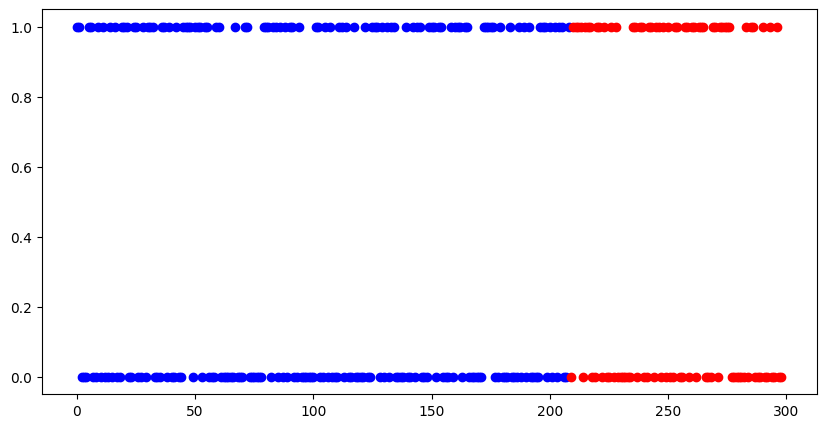

In [23]:
#Design of scatterplot
plt.figure(figsize=(10, 5))
plt.scatter(range(len(Y_train)), Y_train, color='blue', label='Training Data')
plt.scatter(range(len(Y_train), len(Y_train) + len(Y_test)), Y_test, color='red', label='Testing Data')